In [1]:
%pip install seaborn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
CLASSES = ["glioma" , "meningioma" , "notumor", "pituitary"]
IMAGESIZE = 224

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up your ImageDataGenerator with normalization (rescaling)
traindata_gen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to the range [0, 1]
)

# Load your training data
traindata = traindata_gen.flow_from_directory(
    directory="data/train",
    target_size=(224, 224),  # Resize images to the desired dimensions
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    classes=CLASSES,  # Specify the class names
)

# Set up the test/dev data generator with the same normalization
testdata_gen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load your validation data
devdata = testdata_gen.flow_from_directory(
    directory="data/dev",
    target_size=(224, 224),  # Ensure consistent image size
    class_mode='categorical',  # Class mode should match the training setup
    classes=CLASSES,
)


Found 10631 images belonging to 4 classes.
Found 2126 images belonging to 4 classes.


In [7]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Parameters
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = 4
UNFREEZE_LAYERS = 4
K_NEIGHBORS = 5

# Load pre-trained MobileNetV2 without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Optionally unfreeze the last few layers
for layer in base_model.layers[-UNFREEZE_LAYERS:]:
    layer.trainable = True

# Add global pooling to get feature vectors
x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Image data generator (you can modify this for training/val/test sets)
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

val_generator = datagen.flow_from_directory(
    'data/dev',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

# Extract features from training images
train_features = feature_extractor.predict(train_generator, verbose=1)
train_labels = train_generator.classes  # These are integer labels

# Train KNN on features
knn = KNeighborsClassifier(n_neighbors=K_NEIGHBORS)
knn.fit(train_features, train_labels)

# Extract features from validation images
val_features = feature_extractor.predict(val_generator, verbose=1)
val_labels = val_generator.classes

# Predict and evaluate
val_preds = knn.predict(val_features)
accuracy = accuracy_score(val_labels, val_preds)

print(f'KNN Accuracy on validation set: {accuracy * 100:.2f}%')


Found 10631 images belonging to 4 classes.
Found 2126 images belonging to 4 classes.


c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


333/333 ━━━━━━━━━━━━━━━━━━━━ 111s 330ms/step


c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 323ms/step
KNN Accuracy on validation set: 96.24%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [10]:
# 1. Define ImageDataGenerator (same as train/val)
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# 2. Load Test Dataset using ImageDataGenerator
test_generator = datagen.flow_from_directory(
    'data/test',  # Make sure this folder contains one subfolder per class
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

# 3. Extract Test Features using the feature extractor (MobileNetV2)
test_features = feature_extractor.predict(test_generator, verbose=1)

# 4. Get true labels and class names
test_labels = test_generator.classes
test_label_names = list(test_generator.class_indices.keys())


Found 1419 images belonging to 4 classes.


c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step


In [11]:
test_preds = knn.predict(test_features)
accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 96.69%


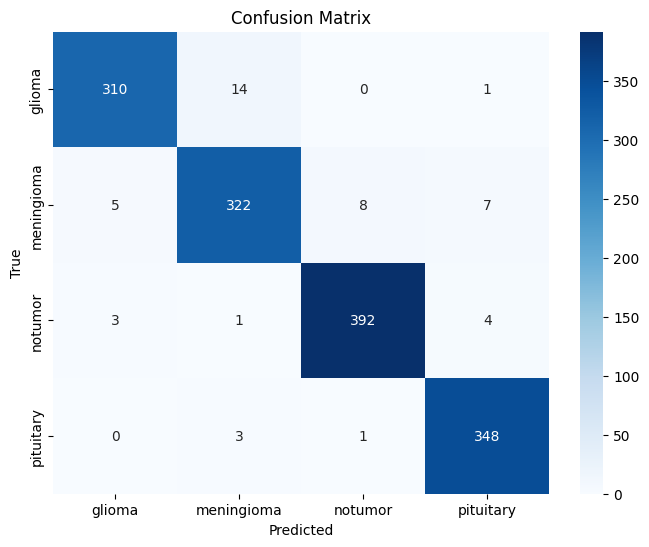

📊 Classification Metrics:
Accuracy      : 0.9669
Error Rate    : 0.0331
Precision     : 0.9665
Sensitivity   : 0.9660
F1 Score      : 0.9662


In [14]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_label_names, yticklabels=test_label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute metrics
accuracy = accuracy_score(test_labels, test_preds)
error_rate = 1 - accuracy
precision = precision_score(test_labels, test_preds, average='macro', zero_division=0)
recall = recall_score(test_labels, test_preds, average='macro', zero_division=0)
f1 = f1_score(test_labels, test_preds, average='macro', zero_division=0)

# Print summary
print("📊 Classification Metrics:")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Error Rate    : {error_rate:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Sensitivity   : {recall:.4f}")  # Sensitivity == Recall
print(f"F1 Score      : {f1:.4f}")



Macro ROC AUC Score: 0.9775


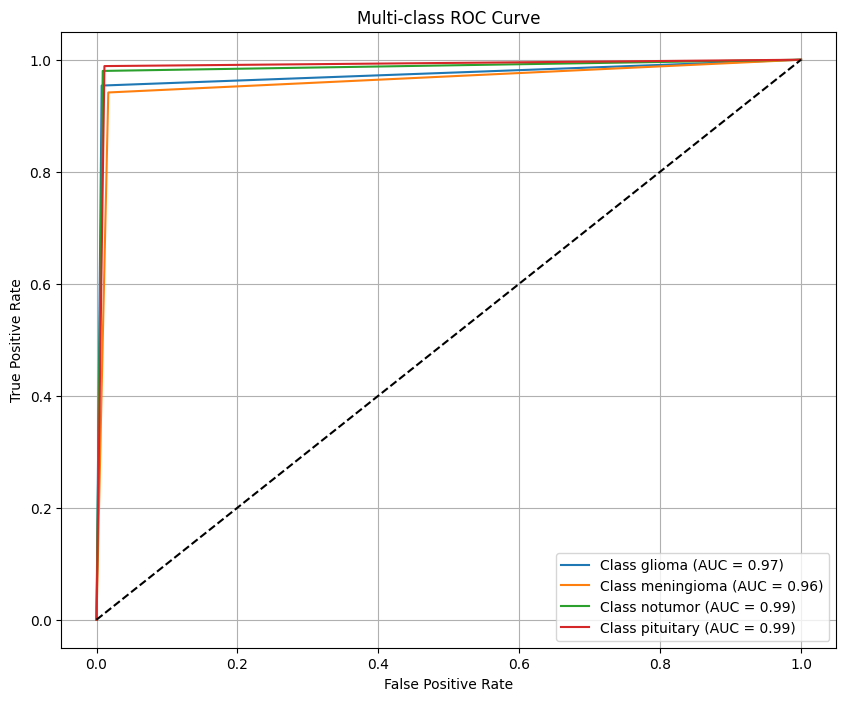

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

# One-hot encode true and predicted labels
test_labels_bin = label_binarize(test_labels, classes=range(NUM_CLASSES))
test_preds_bin = label_binarize(test_preds, classes=range(NUM_CLASSES))

# Compute ROC AUC
roc_auc = roc_auc_score(test_labels_bin, test_preds_bin, average='macro')
print(f'Macro ROC AUC Score: {roc_auc:.4f}')

# Compute and plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_per_class = dict()

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_preds_bin[:, i])
    roc_auc_per_class[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {test_label_names[i]} (AUC = {roc_auc_per_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
